In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import numpy as np

In [2]:
a = 'sequential_PAPI_fixed_num_buckets_10.txt'

a.split('_')

['sequential', 'PAPI', 'fixed', 'num', 'buckets', '10.txt']

/tmp/ipykernel_58735/3292398966.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


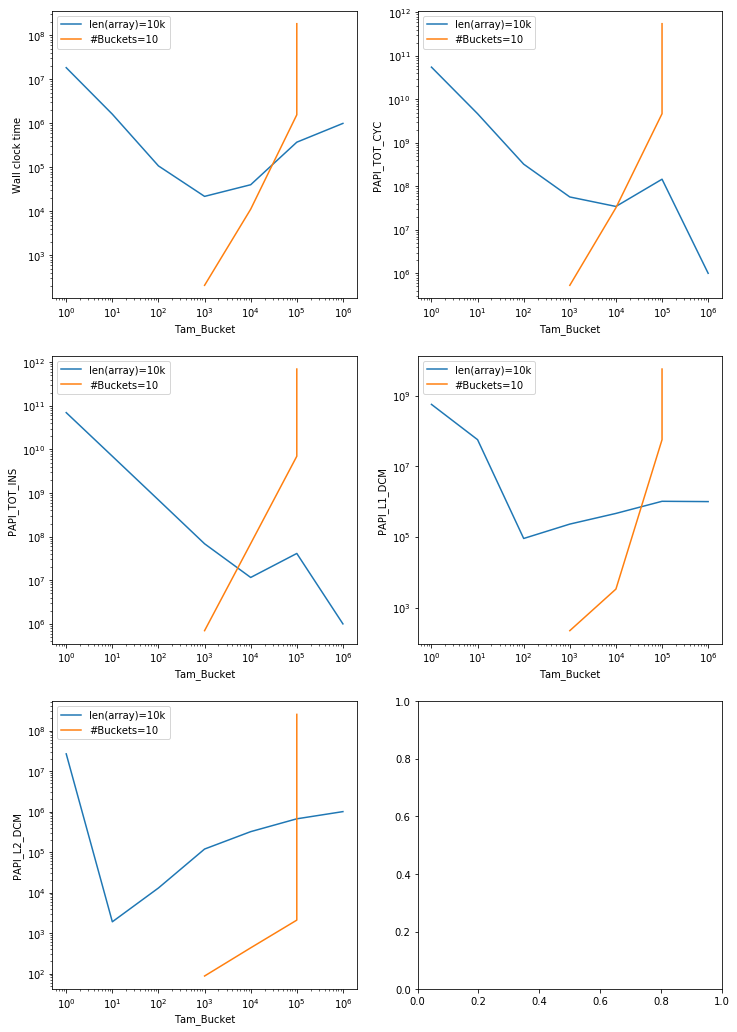

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
# Plot sequential PAPI graphs
x_axis = 'Tam_Bucket'
columns_to_plot = ['Wall clock time', 'PAPI_TOT_CYC', 'PAPI_TOT_INS', 'PAPI_L1_DCM',
       'PAPI_L2_DCM']
num_cols = 2


num_rows = int(np.ceil((len(columns_to_plot) - 1) / num_cols))+1
fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, 18))
i= 0

for column in columns_to_plot:
       # Plot  
       row, col = int(i/num_cols), i%num_cols
       i +=1

       plt.figure()
       for file_path in [x for x in glob(join('data', '*.txt')) if 'sequential' in x and 'PAPI' in x]:

              label_name = '#Buckets=10' if basename(file_path).split('_')[3] == 'num' else 'len(array)=10k'

              data = pd.read_csv(file_path, sep='\t')
              ax[row, col].plot(data[x_axis], data[column], label=label_name)

       # Labels
       ax[row, col].set_xlabel(x_axis)
       ax[row, col].set_ylabel(column)

       # Scales
       ax[row, col].set_xscale('log')
       ax[row, col].set_yscale('log')

       # Legend
       ax[row, col].legend()


# Save image
fig.savefig(join(os.getcwd(), 'graficos', f'sequential_PAPI.png'))
fig.show()
#fig.tight_layout()
#plt.savefig('data_exploratio.png', bbox_inches='tight', dpi=100)

/tmp/ipykernel_58735/170708267.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


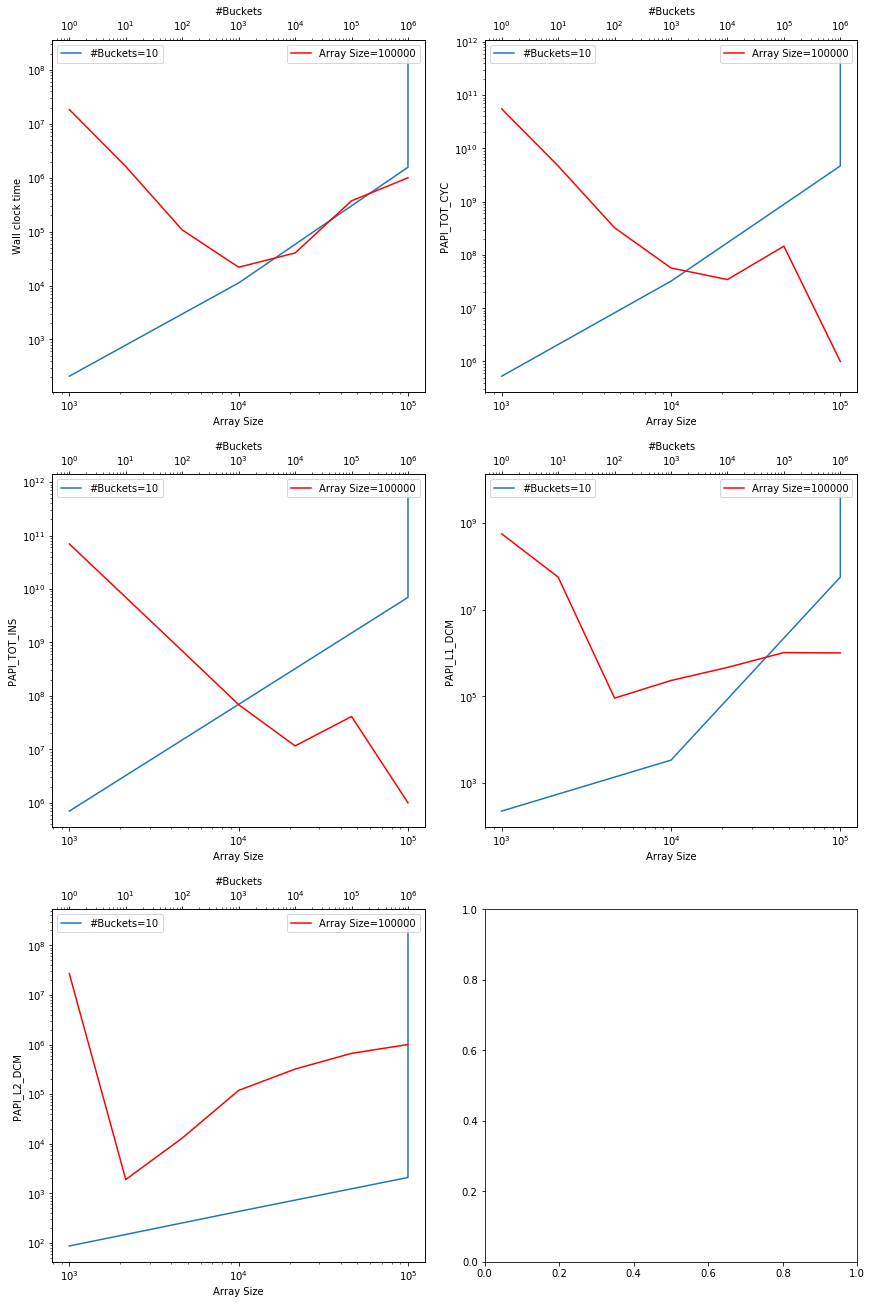

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [19]:
# Plot sequential PAPI graphs
x_axis = 'Tam_Bucket'
columns_to_plot = ['Wall clock time', 'PAPI_TOT_CYC', 'PAPI_TOT_INS', 'PAPI_L1_DCM',
       'PAPI_L2_DCM']
num_cols = 2


num_rows = int(np.ceil((len(columns_to_plot) - 1) / num_cols))+1
fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, 18), constrained_layout=True)


i= 0

for column in columns_to_plot:
       # Plot  
       # Plot  
       row, col = int(i/num_cols), i%num_cols
       i +=1

       plt.figure()
       k = 0
       
       data = pd.read_csv('data/sequential_PAPI_fixed_num_buckets_10.txt', sep='\t')
       label_name = '#Buckets=10'

       ax[row, col].plot(data[x_axis], data[column], label=label_name)

       # Labels
       ax[row, col].set_xlabel('Array Size')
       ax[row, col].set_ylabel(column)

       # Scales
       ax[row, col].set_xscale('log')
       ax[row, col].set_yscale('log')

       # Legend
       ax[row, col].legend()

       ax2 = ax[row, col].twiny()


       data = pd.read_csv('data/sequential_PAPI_fixed_tam_buckets_100000.txt', sep='\t')
       label_name = 'Array Size=100000'

       ax2.plot(data[x_axis], data[column], 'red', label=label_name)

       # Labels
       ax2.set_xlabel('#Buckets')
       ax2.set_ylabel(column)

       # Scales
       ax2.set_xscale('log')
       ax2.set_yscale('log')

       # Legend
       ax2.legend()



# Save image
plt.tight_layout()
fig.savefig(join(os.getcwd(), 'graficos', f'sequential_PAPI.png'))
fig.show()
#fig.tight_layout()
#plt.savefig('data_exploratio.png', bbox_inches='tight', dpi=100)